In [1]:
import numpy as np
import pandas as pd

In [2]:
coins = np.random.choice([0, 1], 10)

In [3]:
coins

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [5]:
import matplotlib.pyplot as plt

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 5.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

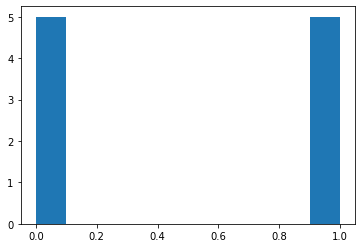

In [6]:
plt.hist(coins)

In [7]:
np.mean(coins)

0.5

In [27]:
coins2 = np.random.choice([0, 1, 2], 1000)

In [28]:
coins2[:5]

array([2, 1, 1, 0, 1])

In [29]:
np.mean(coins2)

1.023

(array([317.,   0.,   0.,   0.,   0., 343.,   0.,   0.,   0., 340.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

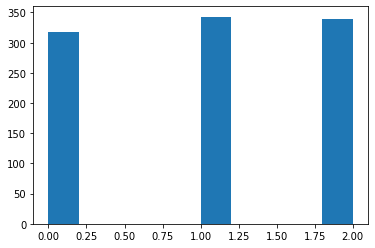

In [30]:
plt.hist(coins2)

The histogram now has three peaks with a taller central one because there are now three values to choose from: 0, 1, or 2 heads. With 2 fair coins, it makes sense that in a normal distribution, there would be more occurrences of 1 head, since there is a 50% chance of each coin landing on heads.

In [39]:
coins5 = np.random.choice([0, 1, 2, 3, 4, 5], 1000)

In [40]:
coins5[:5]

array([3, 5, 5, 2, 3])

(array([159.,   0., 142.,   0., 182.,   0., 167.,   0., 161., 189.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

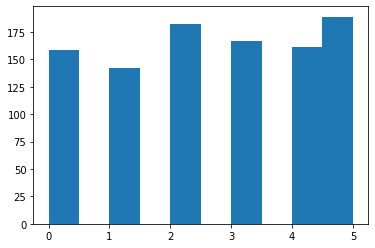

In [41]:
plt.hist(coins5)

In [42]:
np.mean(coins5)

2.596

For some reason, the 1000 trials with 2 coins looked more evenly distributed

In [43]:
coins100 = np.random.choice(range(101), 1000)

In [44]:
coins100[:5]

array([30, 56, 30, 20, 14])

(array([ 99., 107., 107.,  83., 101., 105.,  87., 115.,  94., 102.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

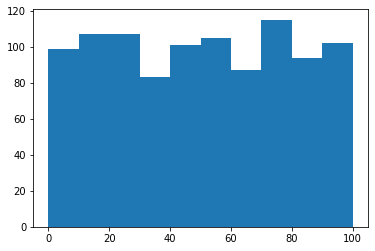

In [45]:
plt.hist(coins100)

In [47]:
np.mean(coins100)

49.566

In [48]:
np.var(coins100)

852.3196439999999

In [49]:
from scipy.stats import norm

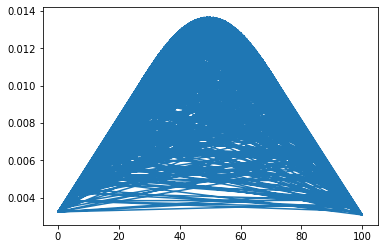

In [57]:
d = norm(np.mean(coins100), np.std(coins100))
plt.plot(coins100, d.pdf(coins100))